### 전이학습코드

### 어깨 틀어짐

Found 63 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_______________________________________________

C:\ProgramData\Anaconda3\envs\tf_2_4\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
13/13 [==============================] - 7s 451ms/step - loss: 0.6382 - accuracy: 0.6825 - val_loss: 0.5583 - val_accuracy: 0.7000

Epoch 00001: val_loss improved from inf to 0.55826, saving model to ./model\01-0.5583final_project.hdf5
Epoch 2/3
13/13 [==============================] - 6s 430ms/step - loss: 0.4999 - accuracy: 0.7460 - val_loss: 0.4199 - val_accuracy: 0.8000

Epoch 00002: val_loss improved from 0.55826 to 0.41993, saving model to ./model\02-0.4199final_project.hdf5
Epoch 3/3
13/13 [==============================] - 6s 434ms/step - loss: 0.3344 - accuracy: 0.9206 - val_loss: 0.3147 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.41993 to 0.31474, saving model to ./model\03-0.3147final_project.hdf5


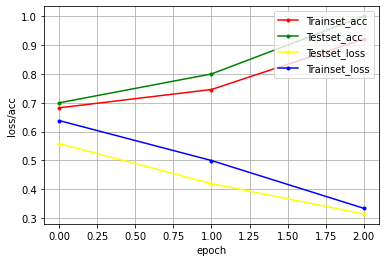

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics, Input, models, layers
from tensorflow.keras.applications import VGG16

np.random.seed(3)
tf.compat.v1.set_random_seed(3)
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory('C:/Users/leesu/model/pose_estimation/openpose-master/train_part_shoulder',
                                                    target_size = (150, 150), batch_size = 5,
                                                    class_mode = 'binary')
test_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)#여기에 이거 안주면 accuracy가 더 낮다
test_generator = test_datagen.flow_from_directory('C:/Users/leesu/model/pose_estimation/openpose-master/test_part_shoulder',
                                                  target_size = (150, 150), batch_size = 5,
                                                  class_mode = 'binary')
transfer_model = VGG16(weights='imagenet', include_top = False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()
finetune_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}final_project.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose =1,
                              save_best_only = True)
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience = 5)

# 모델 실행
history = finetune_model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=3,
                    validation_data = test_generator,callbacks=[checkpointer, early_stopping_callback])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='green', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='yellow', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()



### 골반 틀어짐

Found 55 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_______________________________________________

C:\ProgramData\Anaconda3\envs\tf_2_4\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
11/11 [==============================] - 7s 524ms/step - loss: 0.7229 - accuracy: 0.6000 - val_loss: 0.4495 - val_accuracy: 0.9000

Epoch 00001: val_loss improved from inf to 0.44945, saving model to ./model\01-0.4495final_project_hip.hdf5
Epoch 2/3
11/11 [==============================] - 5s 473ms/step - loss: 0.4192 - accuracy: 0.8909 - val_loss: 0.3220 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.44945 to 0.32197, saving model to ./model\02-0.3220final_project_hip.hdf5
Epoch 3/3
11/11 [==============================] - 5s 481ms/step - loss: 0.2901 - accuracy: 0.9636 - val_loss: 0.2348 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.32197 to 0.23483, saving model to ./model\03-0.2348final_project_hip.hdf5


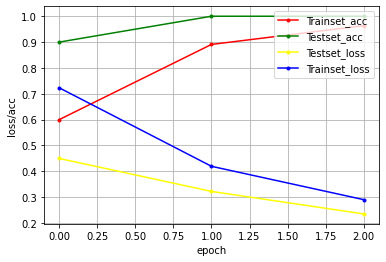

In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics, Input, models, layers
from tensorflow.keras.applications import VGG16

np.random.seed(3)
tf.compat.v1.set_random_seed(3)
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory('C:/Users/leesu/model/pose_estimation/openpose-master/train_part_hip',
                                                    target_size = (150, 150), batch_size = 5,
                                                    class_mode = 'binary')
test_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)#여기에 이거 안주면 accuracy가 더 낮다
test_generator = test_datagen.flow_from_directory('C:/Users/leesu/model/pose_estimation/openpose-master/test_part_hip',
                                                  target_size = (150, 150), batch_size = 5,
                                                  class_mode = 'binary')
transfer_model = VGG16(weights='imagenet', include_top = False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()
finetune_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}final_project_hip.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose =1,
                              save_best_only = True)
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience = 5)

# 모델 실행
history = finetune_model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=3,
                    validation_data = test_generator,callbacks=[checkpointer, early_stopping_callback])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='green', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='yellow', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()


### 오다리

Found 61 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_______________________________________________

C:\ProgramData\Anaconda3\envs\tf_2_4\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


13/13 [==============================] - 7s 434ms/step - loss: 0.5473 - accuracy: 0.6885 - val_loss: 0.4712 - val_accuracy: 0.7000

Epoch 00001: val_loss improved from inf to 0.47123, saving model to ./model\01-0.4712final_project_legs.hdf5
Epoch 2/3
13/13 [==============================] - 5s 416ms/step - loss: 0.3581 - accuracy: 0.7705 - val_loss: 0.4775 - val_accuracy: 0.9000

Epoch 00002: val_loss did not improve from 0.47123
Epoch 3/3
13/13 [==============================] - 5s 422ms/step - loss: 0.1745 - accuracy: 0.9672 - val_loss: 0.4615 - val_accuracy: 0.8000

Epoch 00003: val_loss improved from 0.47123 to 0.46152, saving model to ./model\03-0.4615final_project_legs.hdf5


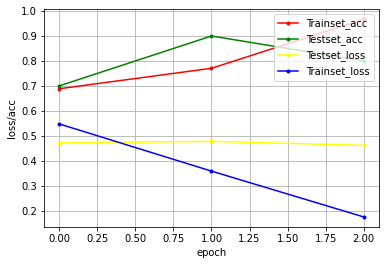

In [3]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics, Input, models, layers
from tensorflow.keras.applications import VGG16

np.random.seed(3)
tf.compat.v1.set_random_seed(3)
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory('C:/Users/leesu/model/pose_estimation/openpose-master/train_part_legs',
                                                    target_size = (150, 150), batch_size = 5,
                                                    class_mode = 'binary')
test_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)#여기에 이거 안주면 accuracy가 더 낮다
test_generator = test_datagen.flow_from_directory('C:/Users/leesu/model/pose_estimation/openpose-master/test_part_legs',
                                                  target_size = (150, 150), batch_size = 5,
                                                  class_mode = 'binary')
transfer_model = VGG16(weights='imagenet', include_top = False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()
finetune_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}final_project_legs.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose =1,
                              save_best_only = True)
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience = 5)

# 모델 실행
history = finetune_model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=3,
                    validation_data = test_generator,callbacks=[checkpointer, early_stopping_callback])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='green', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='yellow', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()
